In [1]:
import h5py
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import utils

matplotlib.rcParams['figure.figsize'] = [8, 5]
matplotlib.rcParams['figure.dpi'] = 100

In [2]:
def uJy2mAB(flux): return -2.5*np.log10(flux)+23.9

def mAB2uJy(mag): return np.power(10,(mag-23.9)/-2.5)

def dflux(mag_err,flux): return mag_err*flux/1.08574

In [3]:
mzls_origin = h5py.File('/Users/rain/emulator/CESS_input/seedcat2_0420_727_MzLS_0csp_sfh200_bc2003_hr_stelib_chab_neb_300r_i0100_2dal8_10.hdf5')

In [4]:
for name in mzls_origin:
    print(name)
    # if group，show the group name and datasets
    if isinstance(mzls_origin[name], h5py.Group):
        for subname in mzls_origin[name]:
            print(f"  {subname}")

ID
best_fit
  spec_csp_sfh200_bc2003_hr_stelib_chab_neb_300r_i0100_2dal8[0,1]
  wavelength_rest
  z
filters
  filter_0
  filter_1
  filter_10
  filter_11
  filter_12
  filter_13
  filter_14
  filter_2
  filter_3
  filter_4
  filter_5
  filter_6
  filter_7
  filter_8
  filter_9
parameters
parameters_name


In [5]:
idx = 19622


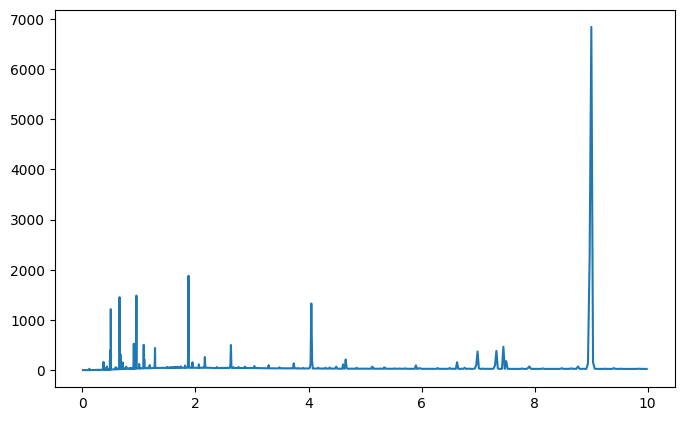

In [6]:
plt.plot(mzls_origin['best_fit']['wavelength_rest'][:],mzls_origin['best_fit']['spec_csp_sfh200_bc2003_hr_stelib_chab_neb_300r_i0100_2dal8[0,1]'][idx])

In [7]:
phot_wave = mzls_origin['best_fit']['wavelength_rest'][:]*1e4*(1+mzls_origin['best_fit']['z'][idx])
phot_flux = mzls_origin['best_fit']['spec_csp_sfh200_bc2003_hr_stelib_chab_neb_300r_i0100_2dal8[0,1]'][idx]*1e-29

In [8]:
(1+mzls_origin['best_fit']['z'][idx])

1.373891

(2000.0, 10000.0)

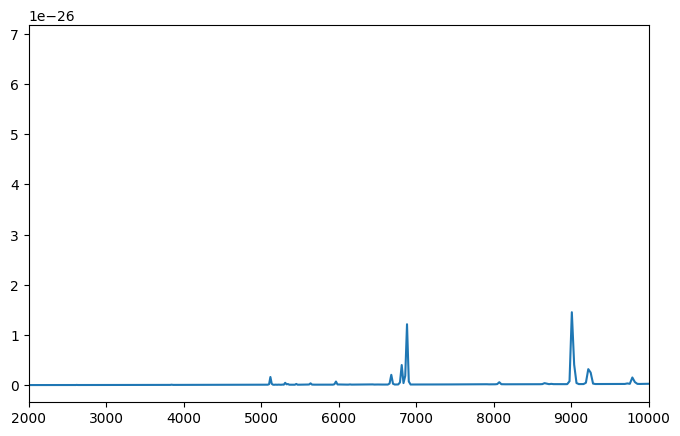

In [9]:
plt.plot(phot_wave,phot_flux)
plt.xlim(2000,10000)

In [10]:
mzls = h5py.File('/Users/rain/emulator/CESS_output/CSST_grism_23514_seedcat2_0420_1204_MzLS_0csp_sfh200_bc2003_hr_stelib_chab_neb_300r_i0100_2dal8_10.hdf5')

In [11]:
for name in mzls:
    print(name)
    # if group，show the group name and datasets
    if isinstance(mzls[name], h5py.Group):
        for subname in mzls[name]:
            print(f"  {subname}")

GI
  detect_el_elnumber
  detect_el_id
  detect_el_idx
  detect_el_snr
  detect_el_wave
  ferr
  flux_elec
  flux_ujy
  flux_ujy_with_noise
  intri_el_elnumber
  intri_el_id
  intri_el_idx
  intri_el_wave
  snr
  snr_mask
  spec_mask
  wave
GU
  ferr
  flux_elec
  flux_ujy
  flux_ujy_with_noise
  snr
  snr_mask
  spec_mask
  wave
GV
  detect_el_elnumber
  detect_el_id
  detect_el_idx
  detect_el_snr
  detect_el_wave
  ferr
  flux_elec
  flux_ujy
  flux_ujy_with_noise
  intri_el_elnumber
  intri_el_id
  intri_el_idx
  intri_el_wave
  snr
  snr_mask
  spec_mask
  wave
ID
data_mask
parameters_desi
parameters_grism
parameters_phot


GI\
  -detect_el_elnumber\
  -detect_el_id\
  -detect_el_idx\
  -detect_el_snr\
  -detect_el_wave\
  -ferr\
  -flux_elec\
  -flux_ujy\
  -flux_ujy_with_noise\
  -intri_el_elnumber\
  -intri_el_id\
  -intri_el_idx\
  -intri_el_wave\
  -snr\
  -snr_mask\
  -spec_mask\
  -wave\

GU\
  -ferr\
  -flux_elec\
  -flux_ujy\
  -flux_ujy_with_noise\
  -snr\
  -snr_mask\
  -spec_mask\
  -wave\

GV\
  -detect_el_elnumber\
  -detect_el_id\
  -detect_el_idx\
  -detect_el_snr\
  -detect_el_wave\
  -ferr\
  -flux_elec\
  -flux_ujy\
  -flux_ujy_with_noise\
  -intri_el_elnumber\
  -intri_el_id\
  -intri_el_idx\
  -intri_el_wave\
  -snr\
  -snr_mask\
  -spec_mask\
  -wave\

ID\
data_mask\
parameters_desi\
parameters_grism\
parameters_phot


### data_mask
if data_mask = 1, the according source is a valid one.
if data_mask = 2,  the according source is an invalid one.

(array([    0.,     0.,     0.,     0.,     0., 23514.,     0.,     0.,
            0.,     0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <BarContainer object of 10 artists>)

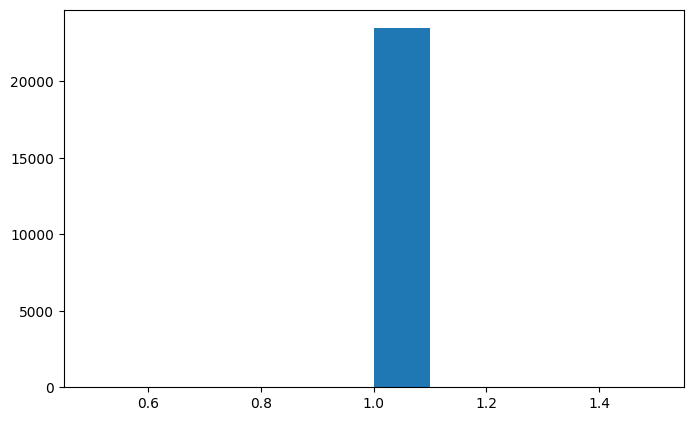

In [12]:
plt.hist(mzls['data_mask'][:])

In [13]:
len(mzls['GU']['wave'][:])

338

In [14]:
len(mzls['GV']['wave'][:])

393

In [15]:
len(mzls['GI']['wave'][:])

516

(0.0, 100.0)

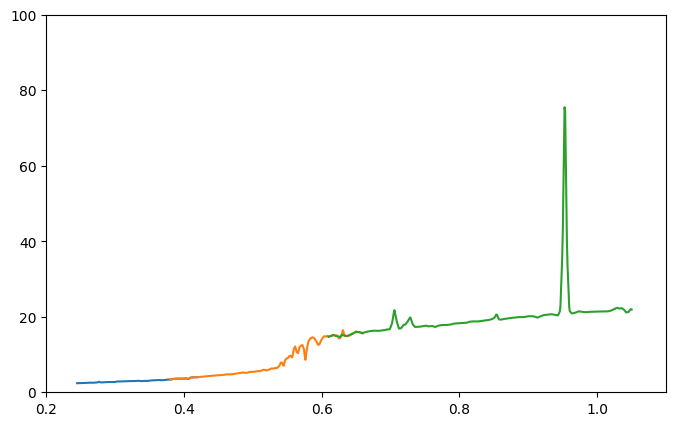

In [16]:
# plt.plot(mzlso['best_fit']['wavelength_rest'][:]*(1+mzlso['best_fit']['z'][19622]),mzlso['best_fit']['spec_csp_sfh201_bc2003_hr_stelib_kroup_neb_300r_i0100_2dal8[0,1]'][19622])
# plt.plot(modspec['wavelength_obs'],modspec['spectra_mod']+6)
# plt.plot(modspec['wavelength_obs'],modspec['spectra_obs'])
plt.plot(mzls['GU']['wave'][:]/1e4,mzls['GU']['flux_ujy'][idx])
plt.plot(mzls['GV']['wave'][:]/1e4,mzls['GV']['flux_ujy'][idx])
plt.plot(mzls['GI']['wave'][:]/1e4,mzls['GI']['flux_ujy'][idx])
plt.xlim(0.2,1.1)
plt.ylim(0,100)

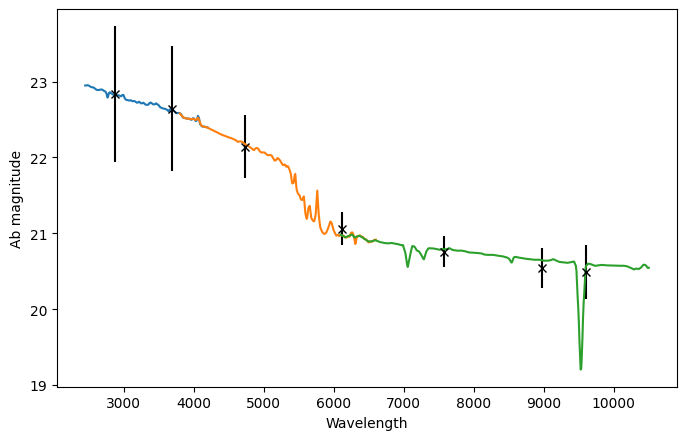

In [17]:
plt.errorbar(2877.52,mzls['parameters_phot'][0,idx], mzls['parameters_phot'][7,idx],c='k',marker='x')
plt.errorbar(3683.53,mzls['parameters_phot'][1,idx], mzls['parameters_phot'][8,idx],c='k',marker='x')
plt.errorbar(4729.27,mzls['parameters_phot'][2,idx], mzls['parameters_phot'][9,idx],c='k',marker='x')
plt.errorbar(6121.62,mzls['parameters_phot'][3,idx], mzls['parameters_phot'][10,idx],c='k',marker='x')
plt.errorbar(7578.78,mzls['parameters_phot'][4,idx], mzls['parameters_phot'][11,idx],c='k',marker='x')
plt.errorbar(8979.86,mzls['parameters_phot'][5,idx], mzls['parameters_phot'][12,idx],c='k',marker='x')
plt.errorbar(9607.87,mzls['parameters_phot'][6,idx], mzls['parameters_phot'][13,idx],c='k',marker='x')
plt.plot(mzls['GU']['wave'][:], uJy2mAB(mzls['GU']['flux_ujy'][idx]))
plt.plot(mzls['GV']['wave'][:], uJy2mAB(mzls['GV']['flux_ujy'][idx]))
plt.plot(mzls['GI']['wave'][:], uJy2mAB(mzls['GI']['flux_ujy'][idx]))
plt.ylabel('Ab magnitude',size=10)
plt.xlabel('Wavelength',size=10)
plt.show()

(0.0, 150.0)

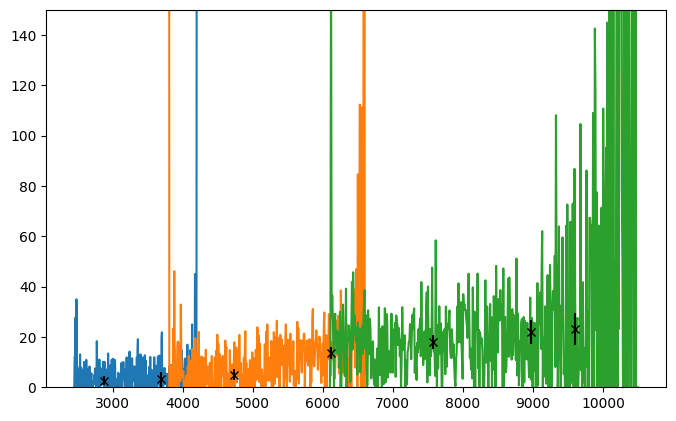

In [18]:
# plt.plot(mzlso['best_fit']['wavelength_rest'][:]*(1+mzlso['best_fit']['z'][idx]),mzlso['best_fit']['spec_csp_sfh201_bc2003_hr_stelib_kroup_neb_300r_i0100_2dal8[0,1]'][idx])

plt.plot(mzls['GU']['wave'][:],mzls['GU']['flux_ujy_with_noise'][idx])
plt.plot(mzls['GV']['wave'][:],mzls['GV']['flux_ujy_with_noise'][idx])
plt.plot(mzls['GI']['wave'][:],mzls['GI']['flux_ujy_with_noise'][idx])

plt.errorbar(2877.52,mAB2uJy(mzls['parameters_phot'][0,idx]), dflux(mzls['parameters_phot'][7,idx],2),c='k',marker='x')
plt.errorbar(3683.53,mAB2uJy(mzls['parameters_phot'][1,idx]), dflux(mzls['parameters_phot'][8,idx],4),c='k',marker='x')
plt.errorbar(4729.27,mAB2uJy(mzls['parameters_phot'][2,idx]), dflux(mzls['parameters_phot'][9,idx],6),c='k',marker='x')
plt.errorbar(6121.62,mAB2uJy(mzls['parameters_phot'][3,idx]), dflux(mzls['parameters_phot'][10,idx],12),c='k',marker='x')
plt.errorbar(7578.78,mAB2uJy(mzls['parameters_phot'][4,idx]), dflux(mzls['parameters_phot'][11,idx],14),c='k',marker='x')
plt.errorbar(8979.86,mAB2uJy(mzls['parameters_phot'][5,idx]), dflux(mzls['parameters_phot'][12,idx],19),c='k',marker='x')
plt.errorbar(9607.87,mAB2uJy(mzls['parameters_phot'][6,idx]), dflux(mzls['parameters_phot'][13,idx],19),c='k',marker='x')
# plt.plot(mzls['GU']['wave'][:], uJy2mAB(mzls['GU']['flux_ujy'][idx]))
# plt.plot(mzls['GV']['wave'][:], uJy2mAB(mzls['GV']['flux_ujy'][idx]))
# plt.plot(mzls['GI']['wave'][:], uJy2mAB(mzls['GI']['flux_ujy'][idx]))

# plt.xlim(0.2,1.1)
plt.ylim(0,150)